# 3. Feature engineering
-----
1. dataset에 존재하는 null data 채우기
    * null data가 위치한 feature의 statistics를 참고
    * 머신러닝 알고리즘으로 예측하여 채워넣음
**train 뿐만 아니라 test에도 똑같이 적용해주자! **

In [5]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns

#plt style을 seaborn 스타일로 세팅. 또한 일일이 font를 지정하지 않고, 한 번에 font_scale로 설정해놓음.
plt.style.use('seaborn')
sns.set(font_scale=2.5)

#인터넷 연결 없이 offline에서 그래프 생성 저장 가능
import plotly.offline as py
#Jupyter Notebook 환경에서 Plotly 그래프를 표시하기 위해. connected='True'로 설정되면 인라인으로 표시됨.
py.init_notebook_mode(connected=True)
#그래프 객체를 생성하여 데이터,레이아웃 및 스타일 지정
import plotly.graph_objs as go
#그래프 작업에 유용한 도구, 그래프 편집 변환.
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

#IPython에서 제공하는 그림,소리,애니메이션과 같은 결과물들을 브라우저에서 바로 볼 수 있게 하는 역할
%matplotlib inline

#데이터 불러오기
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

#FamilySize - EDA 과정에서 해당 Feature들을 가족단위로 묶어버림.
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1


/tmp/ipykernel_32/2749361668.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
train.Fare.isnull() # DataFrame.속성 = Series

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Fare, Length: 891, dtype: bool

In [8]:
train.loc[train.Fare.isnull(),'Fare'] # 해당 index의 Fare 속성만 따로 뽑아냄.

Series([], Name: Fare, dtype: float64)

In [9]:
#Fare - Null 값이 들어 있다면 mean값으로 변경함.
train.loc[train.Fare.isnull(),'Fare']=train['Fare'].mean()

#i>0이면 log값으로 변환한다. 
#map 함수: for 반복문 없이도 적용할 요소에 함수만 넘겨줘도자동적으로 요소에 접근해서 반환해줌.
train['Fare']=train['Fare'].map(lambda i :np.log(i) if i>0 else 0)
test['Fare']=test['Fare'].map(lambda i :np.log(i) if i>0 else 0)

## 3.1 Fill Null

### 3.1.1 Fill Null in Age using title
> "title + statistics "를 사용하자.
이름에 Miss,Mr,Mrs 와 같은 title이 존재함. 이 title을 기반으로 평균 Age를 채워보자.


title을 추출하는 방법
1. str method : data->string으로 바꿔줌.
2. extract method : 정규표현식 적용

In [10]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
# [A-Za-z] : 모든 알파벳이 '+' : 한 번이상 반복 그리고 \. : 마침표를 포함한 것을 찾음
train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.') 
test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.') 

In [12]:
train['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

In [13]:
pd.crosstab(train['Initial'],train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [14]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [15]:
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)

In [16]:
#여성과 관련된 Miss, Mrs의 생존 확률이 높다는 것을 확인할 수 있다.
train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

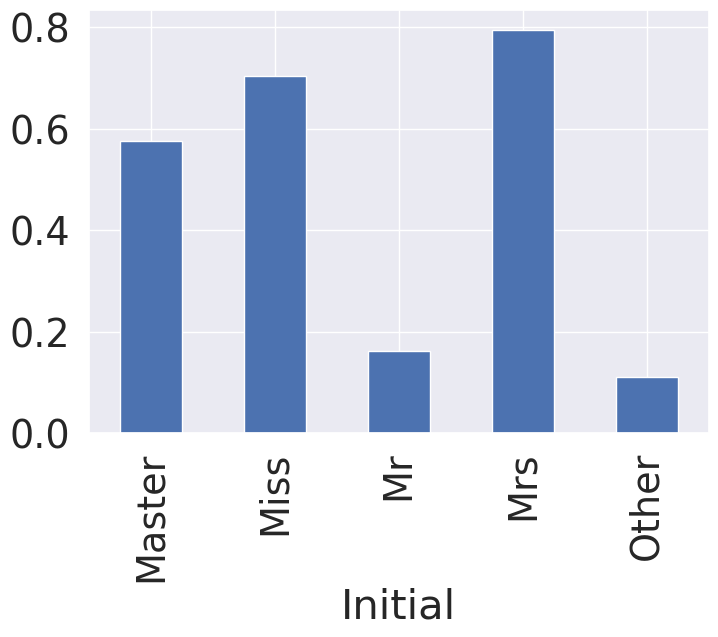

In [17]:
train.groupby('Initial')['Survived'].mean().plot.bar()

**Initial을 분류하고 생존확률까지 확인해봄. 이제 본 목적인 Initial별 Age를 mean을 활용하여 채워넣자.
이 때 test 데이터는 unseen을 유지하기 위해 train에서 얻은 것을 기반으로 채워주어야 한다.**

In [18]:
train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


**dataframe을 다룰 때 boolean array를 이용해 indexing하는 방법이 편리함.**    
**즉 loc+boolean+column을 사용해 값을 치환하자**

In [19]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age'] = 33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age'] = 36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age'] = 5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age'] = 46

In [20]:
#Null data를 전부 채워넣음.
train.loc[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial


### 3.1.2 Fill Null in Embarked
> Embarked는 NULL Value가 2개 있는데, S에서 가장많은 승객을 태웠으므로 S를 단순히 채운다.    
이 때 fillna method를 통해 쉽게 채울 수 있다.


In [21]:
train['Embarked'].fillna('S',inplace=True)

In [22]:
train.loc[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial


## 3.2 Change Age (continuous to categorical)
> continous를 categorical로 바꾸면 information loss가 생길 수 있으나, 다양한 방법을 시다기 위함.    
1. dataframe의 indexing 방법 loc 사용
2. apply 함수 사용

In [23]:
#10살 간격으로 categorical를 나눔.
train['Age_cat']=0
train.loc[train['Age']<10,'Age_cat']=0
train.loc[(10<=train['Age'])&(train['Age']<20),'Age_cat']=1
train.loc[(20<=train['Age'])&(train['Age']<30),'Age_cat']=2
train.loc[(30<=train['Age'])&(train['Age']<40),'Age_cat']=3
train.loc[(40<=train['Age'])&(train['Age']<50),'Age_cat']=4
train.loc[(50<=train['Age'])&(train['Age']<60),'Age_cat']=5
train.loc[(60<=train['Age'])&(train['Age']<70),'Age_cat']=6
train.loc[(70<=train['Age']),'Age_cat']=7

In [24]:
test['Age_cat']=0
test.loc[test['Age']<10,'Age_cat']=0
test.loc[(10<=test['Age'])&(test['Age']<20),'Age_cat']=1
test.loc[(20<=test['Age'])&(test['Age']<30),'Age_cat']=2
test.loc[(30<=test['Age'])&(test['Age']<40),'Age_cat']=3
test.loc[(40<=test['Age'])&(test['Age']<50),'Age_cat']=4
test.loc[(50<=test['Age'])&(test['Age']<60),'Age_cat']=5
test.loc[(60<=test['Age'])&(test['Age']<70),'Age_cat']=6
test.loc[(70<=test['Age']),'Age_cat']=7

In [25]:
def category_age(x):
    if x<10:
        return 0
    elif x<20:
        return 1
    elif x<30:
        return 2
    elif x<40:
        return 3
    elif x<50:
        return 4
    elif x<60:
        return 5
    elif x<70:
        return 6
    else:
        return 7
train['Age_cat_2']=train['Age'].apply(category_age)

**apply 함수의 역할**
> 내가 정의해놓은 함수에 따라 전체 데이터 프레임이나 특정한 column의 값을 일괄적으로 변경하기 위해

In [26]:
# Series 간 boolean 비교후 모든 값 True면 True를 반환하는 메소드 all을 사용
print('1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야 함 ->',(train['Age_cat']==train['Age_cat_2']).all())

1번 방법, 2번 방법 둘다 같은 결과를 내면 True 줘야 함 -> True


In [27]:
#중복되는 Age_cat 컬럼과 Age 컬럼을 제거한다.
train.drop(['Age','Age_cat_2'],axis=1,inplace=True) # 삭제할 레이블명이 1이면 columns
test.drop(['Age'],axis=1,inplace=True)

# 3.3 Change Initial, Embarked and Sex(String to numerical)
> Initial은 Mr,Mrs 등으로 이루어져 컴퓨터가 인식할 수 있도록 수치화 시켜주어야 함.   
이 때 map method를 이용하여 일괄적으로 처리할 수 있음.

In [28]:
train['Initial']=train['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})
test['Initial']=test['Initial'].map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Other':4})

Embarked 또한 컴퓨터가 인식할 수 있도록 변경해주어야 하는데 이때 어떤 카테고리로 나누어 있는지 확인하기 위해 두 method를 사용할 수 있음
* unique
* value_counts

In [29]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
train['Embarked']=train['Embarked'].map({'C':0,'Q':1,'S':2})
test['Embarked']=test['Embarked'].map({'C':0,'Q':1,'S':2})

In [32]:
train['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [33]:
#null값은 존재하지 않음.
train['Embarked'].isnull().any()

False

In [34]:
train['Sex']=train['Sex'].map({'female':0,'male':1})
test['Sex']=test['Sex'].map({'female':0,'male':1})

In [35]:
train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

**feature 간의 상관관계를 알아보자! -1로 갈수록 음의 상관관계, 1로 갈수록 양의 상관관계이며, 0은 상관관계가 없음을 의미한다.**    
 ✅ 상관계수 그래프는 heatmap plot 사용!

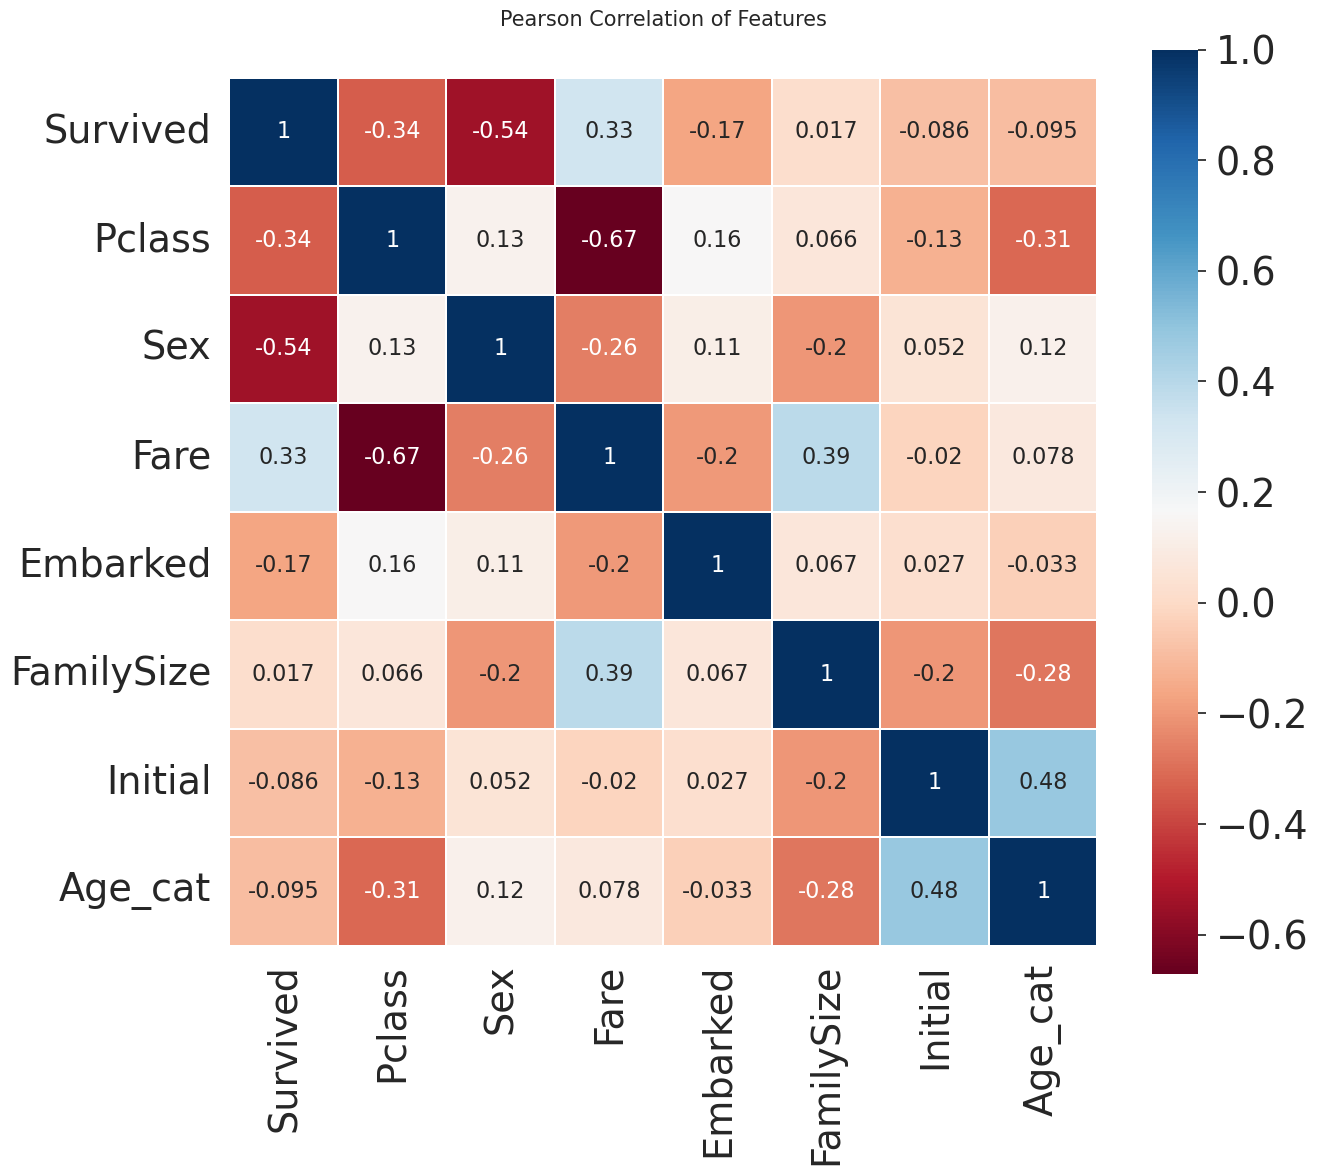

In [36]:
#heatmap에 넣을 feature 들 설정
heatmap_data=train[['Survived','Pclass','Sex','Fare','Embarked','FamilySize','Initial','Age_cat']]

colormap=plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features',y=1.05,size=15)
#corr은 상관관계를 구하는 함수.
sns.heatmap(heatmap_data.astype(float).corr(),linewidths=0.1,vmax=1.0,
           square=True,cmap=colormap,linecolor='white',annot=True,annot_kws={"size":16})

del heatmap_data

**분석 결과**    
* Sex와 Pclass가 생존률과 상관관계가 어느 정도 있음.
* Fare과 Embarked도 어느 정도 상관관계가 있음.
* 서로 강한 상관관계를 지니고 있는 feature 들이 없는 것을 보아, 모델을 학습시킬 때 불필요한 feature들이 없다. (만약 1 or -1의 상관관계를 지닌다면 얻을 수 있는 정보는 하나이므로 불필요한 feature가 존재하는 것.)

## 3.4 One -hot eocoding on Initial and Embarked
---
> 수치화 작업을 진행한 후, 모델의 성능을 높이기 위해서 one-hot encoding을 진행함.
* 수치화 : String to numerical (ex. Master ==0, Miss==1 로 변환
* One-hot encoding : 0과 1로 이뤄진 벡터로 나타내는 것 (ex. Master =(1,0,0,0,0), 등등
* 방법 : 
    1. get_dummies를 이용하여 진행.
    2. sklearn로 Labelencoder + OneHotencoder 이용
    3. category가 100개 넘어가는 경우 one-hot encoding을 통해 100개의 column이 생성되므로 다른 방법도 존재함.

In [37]:
train=pd.get_dummies(train,columns=['Initial'],prefix='Initial')
test=pd.get_dummies(test,columns=['Initial'],prefix='Initial')

**get_dummies(data,prefix,columns)*
* categorical 변수를 dummy 변수로 변경함. 0과 1로 구성된 벡터로 표현됨
* columns : encoded될 데이터의 column
* prefix : dummy variable의 이름

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [39]:
train=pd.get_dummies(train,columns=['Embarked'],prefix='Embarked')
test=pd.get_dummies(test,columns=['Embarked'],prefix='Embarked')

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


In [41]:
# 필요 없는 columns는 제거함.
train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [42]:
train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,0,1,0,0,0,0,1


In [43]:
test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,2.508582,3,2,0,0,0,1,0,0,0,1


# 4. Building machine learning model and prediction using the trained model
> Sklearn은 feature engineering, preprocessing, 지도 학습, 비지도 학습, 모델 평가 파이프 라인 등 머신러닝에 관련된 모듭 작업들이 가능함.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics #모델의 평가를 위함
from sklearn.model_selection import train_test_split #traning set을 쉽게 나누기 위한 함수

## 4.1 Preparation - Split dataset into train,valid,test set
> 학습에 쓰일 데이터와 target label(Survived)를 분리한다. drop 함수 이용

In [52]:
#values를 통해 train data의 데이터들만 뽑아 넣음
X_train=train.drop('Survived',axis=1).values
target_label=train['Survived'].values
X_test=test.values

In [49]:
X_train

array([[3.        , 1.        , 1.98100147, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.        , 4.26666208, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 0.        , 2.07002232, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [3.        , 0.        , 3.15487049, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 3.40119738, ..., 1.        , 0.        ,
        0.        ],
       [3.        , 1.        , 2.04769284, ..., 0.        , 1.        ,
        0.        ]])

In [53]:
#팀 훈련 (train)을 하고 바로 월드컵(test)에 나가는 것이 아니라 여러번의 평가전(valid)를 거쳐
#팀 훈련 정도를 확인
X_train,X_valid,y_train,y_valid=train_test_split(X_train,target_label,test_size=0.3,random_state=2018)

**train_test_split 함수**
> train_test_split(arrays, test_size, train_size, random_state, shuffle, stratify)
* arrays :분할시킬 데이터
* test_size : 테스트 데이터셋의 비율
* random_state : 데이터 분할 시 셔플이 이루어지는 데에 필요한 시드값

## 4.2 Model generation and prediction

In [54]:
#모델을 생성하고 학습하고 예측까지!
model=RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_valid)

In [65]:
#모델의 정확도
print('총 {}명 중 {:.2f}%정확도로 생존을 맞춤'.format(y_valid.shape[0],100*metrics.accuracy_score(y_valid,prediction)))

총 268명 중 82.84%정확도로 생존을 맞춤


**sklearn.metrics.accuracy_score(y_true, y_pred) 함수**
* y_true : 정답 labels
* y_pred : 예측된 labels

## 4.3 Feature importance
> 학습된 모델은 feature importance를 가지게 되고, 이를 통해 어떤 feature에 영향을 많이 받았는지 확인할 수 있음.

In [67]:
from pandas import Series

#각각의 feature 별로 importance를 Series로 나타낼 수 있음.
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance,index=test.columns)

In [70]:
Series_feat_imp

Pclass        0.101243
Sex           0.109385
Fare          0.323991
FamilySize    0.092784
Age_cat       0.120877
Initial_0     0.009891
Initial_1     0.029890
Initial_2     0.143119
Initial_3     0.019968
Initial_4     0.004925
Embarked_0    0.011412
Embarked_1    0.013982
Embarked_2    0.018532
dtype: float64

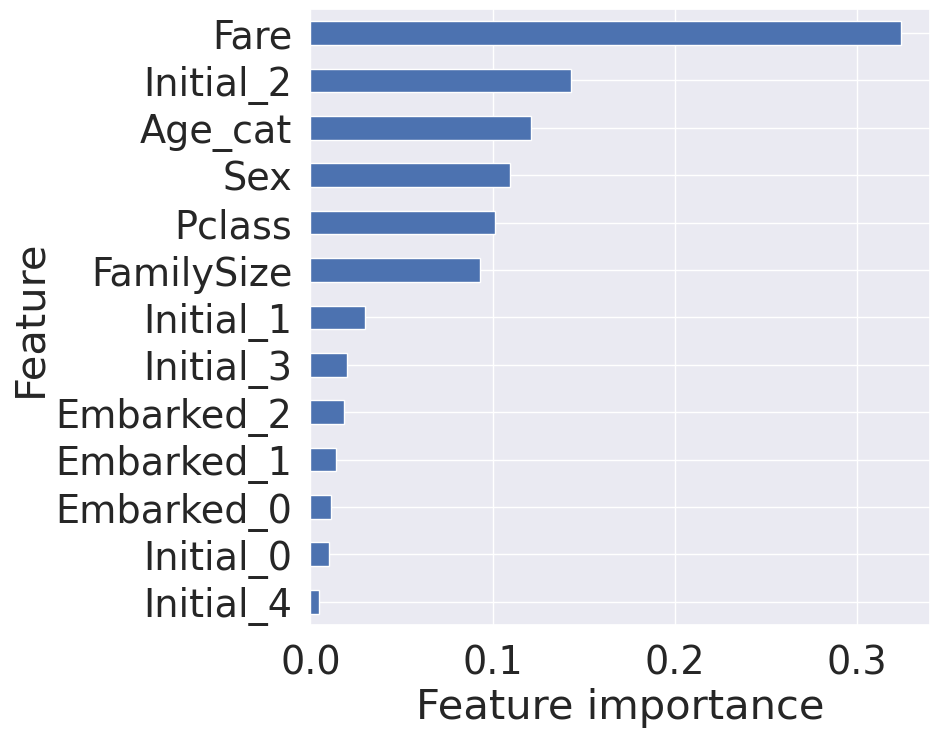

In [69]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending =True).plot.barh() #정렬하여 바 차트로 시각화함.
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

**<정리>**
> Fare가 가장 큰 영향력을 가지고 Initial_2,Age_cat로 중요도를 가진다.
하지만 모델 별로 importance가 다르게 나올 수도 있기에 당장 중요한 feature라고 판단할 수는 없음.
feature importance로 정확도가 높은 모델을 feature selection할 수 있고 제거할 수도 있음.

## 4.4 Prediction on Test set

In [71]:
submission=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [73]:
prediction=model.predict(X_test)
submission['Survived']=prediction

In [75]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
submission.to_csv('/titanic_submission.csv',index=False)